In [1]:
library(zoo)
library(forecast)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [2]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [3]:
preprocessing <- function(ts_csv, total_csv){
    
    # removes rows with low observations and locfs them
    # returns time series and total time series, as a list
    
    ts = read.csv(ts_csv)
    total <- read.csv(total_csv)
    df = data.frame(ts)
    df_total = data.frame(total)
    
    missing = df_total[,'total']<5000
    print(which(missing))
    df_total[missing, 'total'] <- NA
    df[missing,] <-NA
    ts_total = ts(na.locf(df_total[,'total']))
    ts_filled = ts(na.locf(df[, ncol(df)]))
    return(list(series=ts_filled, total=ts_total))
}

In [4]:
sept_cas = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$series[25:696], frequency=24)
sept_tot = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$total[25:696], frequency=24)

 [1] 408 409 470 476 477 712 713 714 715 716
 [1] 408 409 470 476 477 712 713 714 715 716


In [5]:
june_cas = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$series[49:720], frequency=24)
june_tot = ts(preprocessing('E:/summary/june_casual.csv', 'E:/summary/june_total.csv')$total[49:720], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [6]:
sept_perc = sept_cas/sept_tot
june_perc = june_cas/june_tot

In [7]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [8]:
weeks = data.frame(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4)

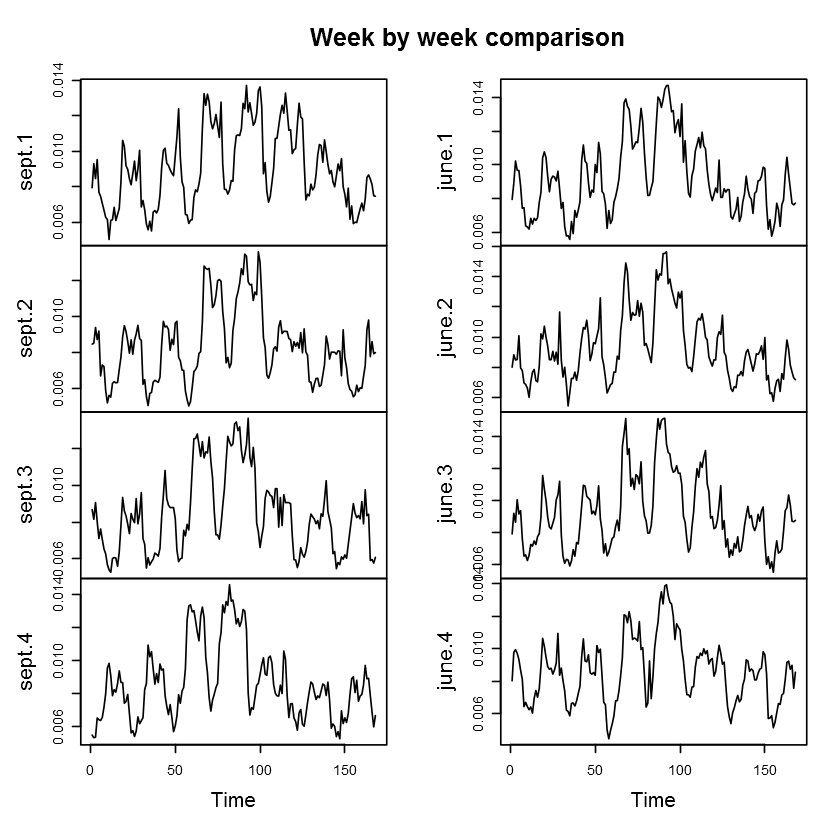

In [9]:
plot.ts(cbind(sept.1, sept.2, sept.3, sept.4, june.1, june.2, june.3, june.4), main='Week by week comparison')

In [16]:
library('cluster')

In [18]:
diss(weeks, METHOD='EUC')

           sept.1     sept.2     sept.3     sept.4     june.1     june.2
sept.2 0.01814754                                                       
sept.3 0.03230709 0.02811351                                            
sept.4 0.04077471 0.03782347 0.02732452                                 
june.1 0.01715721 0.01674590 0.02892005 0.03742143                      
june.2 0.01679324 0.01762183 0.03033819 0.03771344 0.01083138           
june.3 0.01635969 0.01756048 0.02918338 0.03775038 0.01275690 0.01240672
june.4 0.01684871 0.01118857 0.02975778 0.03933182 0.01548069 0.01584009
           june.3
sept.2           
sept.3           
sept.4           
june.1           
june.2           
june.3           
june.4 0.01574367

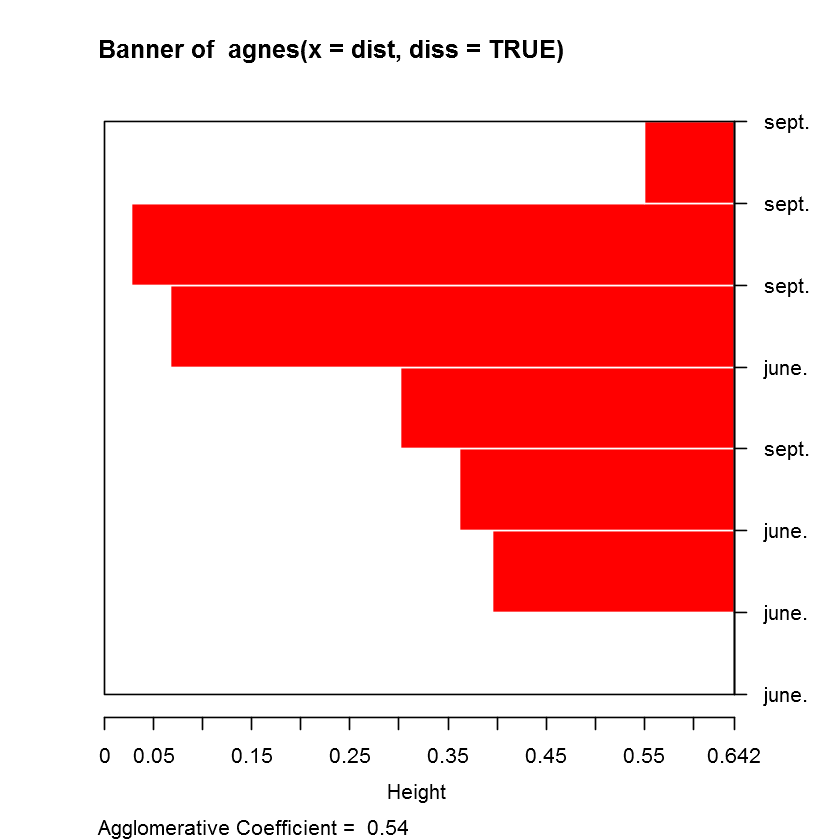

Medoids:
     ID          
[1,] "3" "sept.3"
[2,] "7" "june.3"
Clustering vector:
sept.1 sept.2 sept.3 sept.4 june.1 june.2 june.3 june.4 
     1      1      1      1      1      1      2      1 
Objective function:
    build      swap 
0.1978084 0.1978084 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

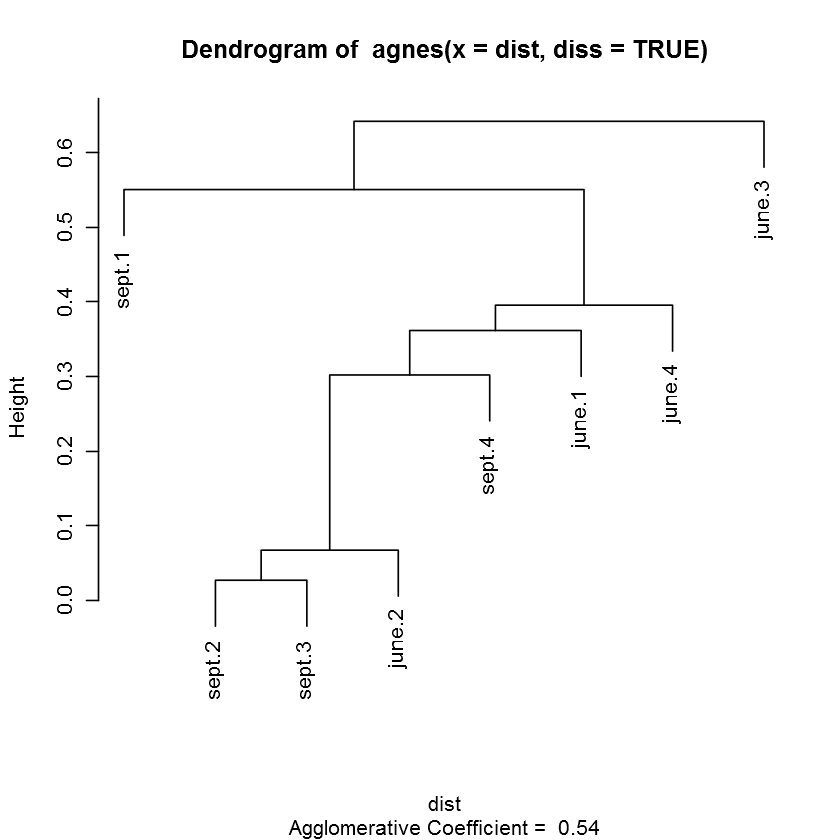

In [15]:
dist = diss(weeks, METHOD='AR.PIC')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

In [34]:
dist = diss(weeks, METHOD='DWT')

In [ ]:
dist = diss(weeks, METHOD='FRECHET')

In [38]:
dist

             sept.1       sept.2       sept.3       sept.4       june.1
sept.2 5.810488e-01                                                    
sept.3 1.132308e+00 1.043656e+00                                       
sept.4 1.426133e+00 1.365424e+00 9.620752e-01                          
june.1 1.490116e-08 5.810488e-01 1.132308e+00 1.426133e+00             
june.2 5.810488e-01 1.490116e-08 1.043656e+00 1.365424e+00 5.810488e-01
june.3 1.132308e+00 1.043656e+00 0.000000e+00 9.620752e-01 1.132308e+00
june.4 1.426133e+00 1.365424e+00 9.620752e-01 0.000000e+00 1.426133e+00
             june.2       june.3
sept.2                          
sept.3                          
sept.4                          
june.1                          
june.2                          
june.3 1.043656e+00             
june.4 1.365424e+00 9.620752e-01

In [39]:
pam(dist, 2, diss=TRUE)

Medoids:
     ID          
[1,] "6" "june.2"
[2,] "8" "june.4"
Clustering vector:
sept.1 sept.2 sept.3 sept.4 june.1 june.2 june.3 june.4 
     1      1      2      2      1      1      2      2 
Objective function:
   build     swap 
0.385781 0.385781 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

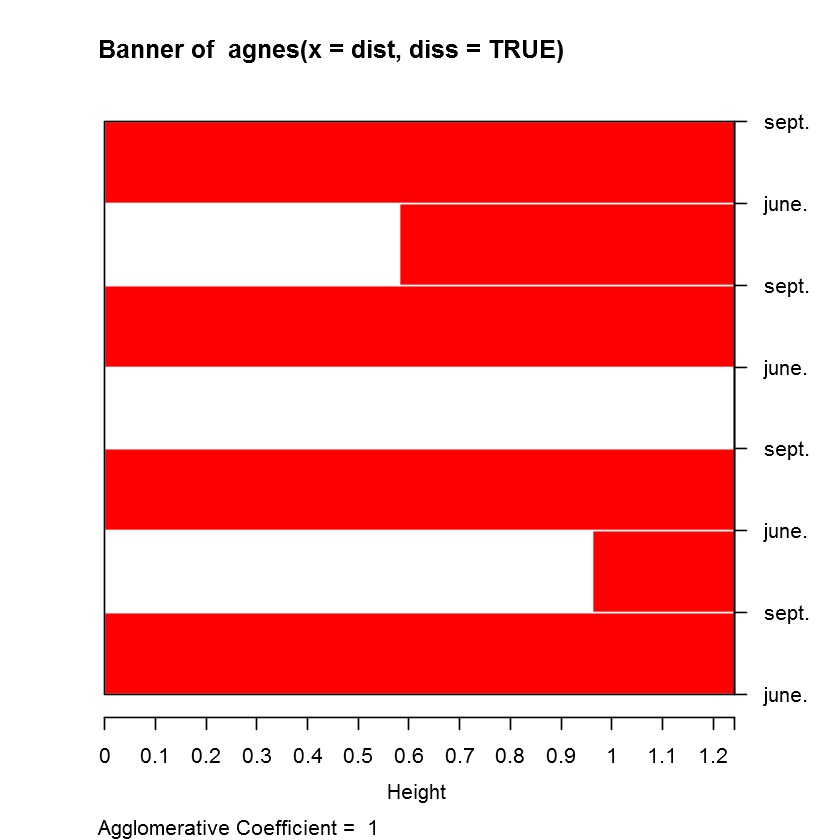

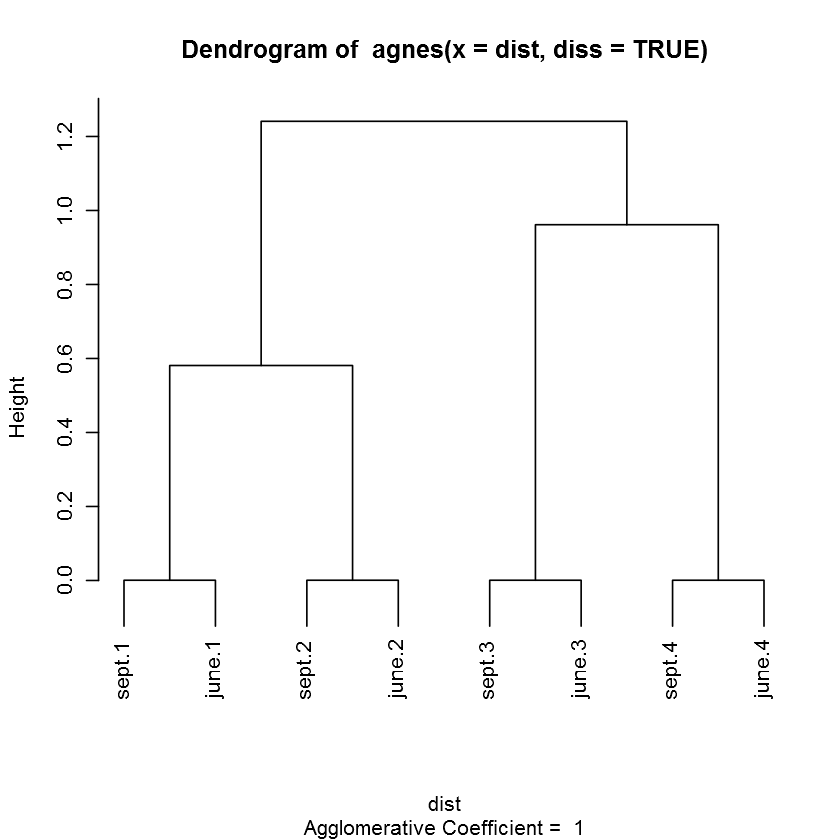

In [41]:
plot(agnes(dist, diss=TRUE))